In [0]:
# I worked on this in google colab
# the availble RAM was not large enough to run the whole file in one go 
# especially because the dataset was too large 
# I ran step 3 independently of step 4 & 5, which I executed in the 2nd run since they are an independent part of this project

In [0]:
pip install opencv-python

In [0]:
import os
print(os.getcwd())

/content


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# to include inline images from the google drive in google colab
# refer to the answer by Richard, in the following stackoverflow post
# https://stackoverflow.com/questions/15557392/how-do-i-display-images-from-google-drive-on-a-website

# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 


![Sample Dog Output](https://drive.google.com/uc?id=1DvxxwkyMOyy0eNkumT5NStBHVvO3ezmP)


In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [0]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/dogImages/train')
valid_files, valid_targets = load_dataset('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/dogImages/valid')
test_files, test_targets = load_dataset('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("/content/gdrive/My Drive/Colab Notebooks/dog-project-master/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [0]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("/content/gdrive/My Drive/Colab Notebooks/dog-project-master/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


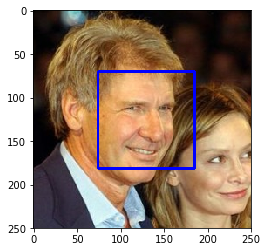

In [0]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__  The percentage of human faces in the respective datasets is as follows:

percentage of human faces in human_files_short: $99\%$

percentage of human faces in dog_files_short: $12\%$

In [0]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# function to compute the percentage of detected_human_faces 
def detected_human_faces(files):
    detected_human_faces=0
    for image_path in files:
        detected_human_faces+=face_detector(image_path)
    
    return detected_human_faces

print("percentage of human faces in human_files_short: {}%".format(detected_human_faces(human_files_short)))
print("percentage of human faces in dog_files_short: {}%".format(detected_human_faces(dog_files_short)))

percentage of human faces in human_files_short: 99%
percentage of human faces in dog_files_short: 12%


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__ I don't think it is always possible to obtain images which presents a clear view of the face. Therefore it is not a very reasonable expectation to pose on the user. The idea behind a Haar cascade face detection is described [here](http://www.willberger.org/cascade-haar-explained/). Given the latest advances in machine learning, it is perhaps better to use deep learning methodologies such as a convolutional neural network based model to detect human faces. One such algorithm, called Multi-task Cascaded Convolutional Network is described in [this paper](https://arxiv.org/ftp/arxiv/papers/1604/1604.02878.pdf). The fact that it performs better than Haar cascades is also demostrated in [this post](https://blog.datawow.io/face-detection-haar-cascade-vs-mtcnn-13af4aa180e6). Similarly, one can also use pretrained weights from VGG-Face and apply transfer learning to detect faces, as described [here](https://www.dlology.com/blog/live-face-identification-with-pre-trained-vggface2-model/).  


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [0]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [0]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 1s 0us/step


### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [0]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [0]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  The percentage of dogs detected in the respective datasets is as follows:

percentage of images in human_files_short having dogs: 1%

percentage of images in dog_files_short having dogs: 100%

In [0]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

def detected_dog(files):
    detected_dogs=0
    for image_path in files:
        detected_dogs+=int(dog_detector(image_path))
    
    return detected_dogs

print("percentage of images in human_files_short having dogs: {}%".format(detected_dog(human_files_short)))
print('percentage of images in dog_files_short having dogs: {}%'.format(detected_dog(dog_files_short)))

percentage of images in human_files_short having dogs: 1%
percentage of images in dog_files_short having dogs: 100%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="https://drive.google.com/uc?id=1firWwM_1xpOI_60OWUejQBYrz12XPyCu" width="100"> | <img src="https://drive.google.com/uc?id=1R_W_kAGcM4iPHs-r6cs_fxzcnGi462Pc" width="200">


It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="https://drive.google.com/uc?id=1SkmrJP464e-NmCHiIrnkXT_fxiaXUdww" width="200"> | <img src="https://drive.google.com/uc?id=1NTs7_KCE9JBgAs83yyRDigAuY9yc8ts1" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
-|-|-
<img src="https://drive.google.com/uc?id=1VCNG1OwoP5NjULGdsXE6ZpWZxWHBPB3-" width="150"> | <img src="https://drive.google.com/uc?id=1doYhbibbvrbNAw4qcj2nZg5CYFTABvjv" width="240"> | <img src="https://drive.google.com/uc?id=1B849VjqO6BK3sfHjilwsBLTWp-Zn3WyF" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [0]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:07<00:00, 132.56it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](https://drive.google.com/uc?id=1IYBeZMT9S0-wqHJEKEyN8dim_LtV9_dh)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.


__Answer:__ 

|#of <br> Conv. layers| # of filters in <br> successive layers| kernel_size| kernel initializer |strides| padding| max_pool_size| padding| Global Avg. <br>Pooling| DNN | dropout <br> rate|# of epochs| test <br> accuracy|
|-|-|-|-|-|-|-|-|-|-|-|-|-|
|3| 8 -> 16 -> 32 |(3,3)|'glorot_uniform'|(2,2)|'same'|(2,2)|'same'|False| 1 hidden layer <br> with 150 neurons|0.255|30|13.64%|

- Note that I ran my code on a GPU through Google colab. 

- Basic strategy: experiment a few models with slightly different variations and comparing them. Choose the best from amongst these and then try to improve it further. 

- Since it can take quite a large time for some of the models to run, its better for initial analysis to run each model for only 5 epochs and compare their performance. Then run the best model for a larger number of epochs if the need arises. 

- Almost all my model consisted of 3 convolutional layers (interlaced with MaxPooling layers). Different models were obtained from varying the number of filters and their kernel size and strides. The output from the final convolutional layer was then fed to a Dense Neural Network with 1 hidden layer with a dropout of 0.2. Again, I tried to experiment a little by changing the number of neurons in the hidden layer. 

- The first model I tried consisted of consisted of 3 convolutional layers with 16, 64 and 256 filters respectively. The kernel size for each filter was (3,3) with strides of 1. Each convulutional layer was followed by MaxPool layer with pool_size = (2,2) (strides in the Maxpool layers being equal to pool_size). I flattened  the final output and fed it into a DNN with one hidden layer of 50 neurons. This amounted to ~ 8.8 million weights in the model. This model took about 15s/epoch and resulted in about  5.86% test accuracy. Meanwhile the accuracy on the training set became ~10.13% after the 5th epoch. This showed that this was an overly complicated model with large overfitting. I therefore tried to come up with a simpler model. 

-  In the above model, I noticed that most of the the weights arose due to the large number of features that are produced from feeding the flattened output of the convolutional layers into the hidden layer. This number will certainly get reduced if instead of flattening the output of the convolutional layers, I apply a global averaging pool and then feed it into the DNN. This gave me my 2nd model, with ~ 177 thousand trainable weights. 

- This 2nd model produces an accuracy of ~3.11% on the test set in 5 epochs. This crosses the required accuracy for the test but  the network looked overly complicated for such a relatively low accuracy. So, I wanted to try a simpler model which might also run faster. To do this I reduced the number of filters in the convolutional layers.

- My 3rd model consisted of 3 convolutional layers with 4, 8 and 16 filters respectively. The kernel size in all these filters was fixed at (3,3) with strides having a size 2. Each covolutional layer was followed by a MaxPooling layer with a kernel size (as well as strides) being (2,2). The final output was passed through a Global averaging layer, and then fed into a DNN with a single hidden layer of 50 neurons. This model had ~ 9,209 trainable weights. 

- This model ran much much faster than model 1 and 2,  taking about 4s per epoch. Meanwhile the accuracy only changed slightly  rising to 3.35% from 3.11% on the previous model. I now tried to increase the complexity of the model a bit in hopes of getting better accuracy. I therefore increased the number of neurons in the hidden layer of the DNN to 150. This became my 4th model. 

- For model 4, neither the timing nor the accuracy changed too significantly when compared to model 3. I therefore made the model  more complicated by flattening the output of the convolutional layers rather than applying a global average pooling.  This became my model 5. 

- I obtained a test accuracy of 5.74% on model 5,  which is much better than the accuracy in our model 3 & 4, meanwhile the time taken by this code is still only 4s per epoch.  I now wanted to see how will things change if I change the kernel initializer from its default 'glorot_uniform' to 'glorot_normal'. This became my model 6. 

- The accuracy of the model dropped slightly upon using 'glorot_normal' for kernel initializer as compared to when we used the default 'glorot_uniform' initializer; It became 5.62% when compared to 5.74% with 'glorot_uniform' . So, let us just stick to 'glorot_uniform' as our kernel initializer from now on. Let us try a little more complicated architechture by increasing the number of filters in the convolutional layers. (It's better to make the CNN more complicated than the DNN, since CNNs perform a much better task at identifying images.).  This becomes model 7.

- My model 7 consisted of 3 convolutional layers having 8, 16 and 32 filters respectively. The kernel size was kept at (3,3) with strides of 2 and 'glorot_uniform' as the kernel initializer. Each conbolutional layer was followed by a MaxPooling layer that with the pool_size (and strides) being (2,2). The output from the final convolutional layer was flattened and then fed into a DNN with a single hidden layer having 150 neurons. 

- After 5 epochs, this produced a test set accuracy of 8.01% while taking a mere 4s per epoch. This model sounds really promising!

- I also tried some other models by increasing the filter size as well as the number of filters. This gave me my models 8 and 9. In another model, I also tried having 4 convolutional layers in stead of 3, however, none of these performed better than model 7. 

- Thus I chose model 7 as my final choice. I applied a RandonSearchCV to this to find the best possible value for dropout rate and foud that 0.255 is preferable. With this dropout rate, I trained it for 30 epochs on augmented data, which gave me a test set accuracy of 13.63%. The time taken was 56s per epoch upon using augumented data ( and about 4s per epoch without augmented data)

- Compared to this Udacity's suggested model was only able to achieve a test accuracy of 5.67% after 20 epochs, taking about 7s per epoch without augmented data. Clearly, our model is better than Udacities model. 


 


In [0]:
train_tensors.shape[1:]

(224, 224, 3)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Dropout
from keras.models import Sequential

In [0]:
from keras import backend as K

In [0]:
from keras.callbacks import ModelCheckpoint  

In [0]:
# function to build my model
# I'll use 3 convolutional layers (interspaced with maxpooling layers)
# All the convolutional layers in the model will have the same kernel_size and strides. Only the number of filter will very across the layers
# All the convolutional layers will have a 'relu' activation and same padding
# All the maxpooling layers will have the same pool_size
# The function inputs are as follows:
   # weights_init: weights initializer; 0 => 'glorot_uniform' , 1 => 'glorot_normal'
   # input_shape: shape of the input tensor
   # kernel_size: the size of the kernel for the filter in the convolutional layers
   # strd: the size of the strides
   # pool_size: the pool_size for the MaxPooling2D layer
   # n_filters_lis: array containing the number of filters in the succesive convolutional layers
   # n_Dense_hidden: number of neurons in the hidden layer. If 0, then don't add the hidden layer 
   # dropout_rate: the dropout rate to be used when applying dropout to the hidden layer in the DNN
   # GlAvgPool: whether or not to use a GlobalAveragePooling layer; default = False
def my_model(weights_init, input_shape, kernel_size, strd, pool_size, n_filters_lis, n_Dense_hidden, dropout_rate=0.2, GlAvgPool=False):
    
    K.clear_session()
    my_model=Sequential()
    
    kernel_init={0:'glorot_uniform', 1:'glorot_normal'}[weights_init]
   
    for n_filters in n_filters_lis: 
        my_model.add(Conv2D(n_filters, kernel_size = kernel_size, strides = strd, activation = 'relu', kernel_initializer=kernel_init, input_shape = input_shape))
        my_model.add(MaxPooling2D(pool_size=pool_size))
    
    # Adding either a Global Average Pooling layer or a flattening layer
    if GlAvgPool==True:
        my_model.add(GlobalAveragePooling2D())
    else:
        my_model.add(Flatten())
        
        
    if n_Dense_hidden>0:
        my_model.add(Dense(n_Dense_hidden, activation='relu'))
        my_model.add(Dropout(dropout_rate))
        
    my_model.add(Dense(len(dog_names), activation='softmax'))
    
    
    return my_model


In [0]:
# function to build the model suggested by Udacity
def udacity_model(input_shape):
    K.clear_session()
    ud_model=Sequential()
    
    ud_model.add(Conv2D(16, 2, activation='relu', input_shape=input_shape))
    ud_model.add(MaxPooling2D(pool_size=(2,2)))
    ud_model.add(Conv2D(32, 2, activation='relu'))
    ud_model.add(MaxPooling2D(pool_size=(2,2)))
    ud_model.add(Conv2D(64, 2, activation='relu'))
    ud_model.add(MaxPooling2D(pool_size=(2,2)))
    ud_model.add(GlobalAveragePooling2D())
    
    ud_model.add(Dense(len(dog_names), activation='softmax'))
    
    return ud_model

In [0]:
# model = Sequential()

### TODO: Define your architecture.

## <font color = green> Final Choice of Model: Model 10  with augmented data , runing for 30 epochs</font>

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=3, strd=2, pool_size=2, n_filters_lis=[8, 16, 32], GlAvgPool=False, n_Dense_hidden=150, dropout_rate=0.255)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rotation_range=1, width_shift_range=0.1,
                          height_shift_range=0.1, horizontal_flip=True,
                          vertical_flip=True)

datagen.fit(train_tensors)

In [0]:
epochs=30
batch_size=20 
steps_per_epoch=train_tensors.shape[0]//batch_size


checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5',
                               verbose=1, save_best_only=True)

model.fit_generator(datagen.flow(train_tensors, train_targets, batch_size=batch_size), 
                    steps_per_epoch=steps_per_epoch, epochs=epochs,
                   verbose=2, callbacks=[checkpointer],
                   validation_data=(valid_tensors, valid_targets))

Epoch 1/30
 - 57s - loss: 4.8813 - acc: 0.0118 - val_loss: 4.8430 - val_acc: 0.0108

Epoch 00001: val_loss improved from inf to 4.84296, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/30
 - 56s - loss: 4.7486 - acc: 0.0246 - val_loss: 4.5950 - val_acc: 0.0299

Epoch 00002: val_loss improved from 4.84296 to 4.59496, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/30
 - 57s - loss: 4.5201 - acc: 0.0362 - val_loss: 4.4447 - val_acc: 0.0347

Epoch 00003: val_loss improved from 4.59496 to 4.44471, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/30
 - 57s - loss: 4.4046 - acc: 0.0443 - val_loss: 4.3672 - val_acc: 0.0503

Epoch 00004: val_loss improved from 4.44471 to 4.36724, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/save

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 13.6364%


__The  test accuracy on this final model was: 13.64%__

## <font color=green>Model 1 (had large overfitting)</font>



__This model caused the GPU to crash and could not run for even a single epoch, so I did not run this section of the code in subsequent re-runs.__

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=3, strd=1, pool_size=2, n_filters_lis=[16, 64, 256], GlAvgPool=False, n_Dense_hidden=50)

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 256)       147712    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 256)       0         
___________________________

__From the above summary we see that the number of weights ballooned due to the large number of features that are produced from feeding the flattened output of the convolutional layers into the hidden layer. This number will certainly get reduced if instead of flattening the output of the convolutional layers, we just apply a global averaging pool.__ 

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 20s - loss: 4.9094 - acc: 0.0081 - val_loss: 4.8218 - val_acc: 0.0108

Epoch 00001: val_loss improved from inf to 4.82176, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 14s - loss: 4.7428 - acc: 0.0246 - val_loss: 4.5836 - val_acc: 0.0443

Epoch 00002: val_loss improved from 4.82176 to 4.58359, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 14s - loss: 4.4823 - acc: 0.0458 - val_loss: 4.3315 - val_acc: 0.0683

Epoch 00003: val_loss improved from 4.58359 to 4.33149, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 14s - loss: 4.2077 - acc: 0.0692 - val_loss: 4.2610 - val_acc: 0.0754

Epoch 00004: val_loss improved from 4.33149 t

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.8612%


__This had a test accuracy of abokut 5.8% while the accuracy on training set was about 10.13%. Considering the enormity of the number ofweights being trained and hence the large complexity of the model, this is quite a low accuracy. The difference between the training and the test set accuracy is also high, indicating large overfitting. Let us reduce the complecxity of the model.__

## <font color=green>Model 2 (quite complicated, yet barely acceptable accuracy)</font>

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=3, strd=1, pool_size=2, n_filters_lis=[16, 64, 256], GlAvgPool=True, n_Dense_hidden=50)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 256)       147712    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 12s - loss: 4.8864 - acc: 0.0085 - val_loss: 4.8735 - val_acc: 0.0108

Epoch 00001: val_loss improved from inf to 4.87351, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 12s - loss: 4.8466 - acc: 0.0133 - val_loss: 4.8013 - val_acc: 0.0168

Epoch 00002: val_loss improved from 4.87351 to 4.80131, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 12s - loss: 4.7779 - acc: 0.0159 - val_loss: 4.7496 - val_acc: 0.0192

Epoch 00003: val_loss improved from 4.80131 to 4.74959, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 12s - loss: 4.7125 - acc: 0.0222 - val_loss: 4.7237 - val_acc: 0.0180

Epoch 00004: val_loss improved from 4.74959 to 4.72371, saving model to /content/gdrive/My Dr

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 3.1100%


__This produces an accuracy of ~3.11% on the test set in 5 epochs. This crosses the required accuracy for the test but the the code took 83 sec per epoch. Let's try a simpler model which might run faster.__

## <font color=green> Model 3 </font>

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=3, strd=2, pool_size=2, n_filters_lis=[4, 8, 16], GlAvgPool=True, n_Dense_hidden=50)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 4)       112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 16)                0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5
### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 5s - loss: 4.8840 - acc: 0.0079 - val_loss: 4.8670 - val_acc: 0.0096

Epoch 00001: val_loss improved from inf to 4.86702, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 4s - loss: 4.8562 - acc: 0.0144 - val_loss: 4.8270 - val_acc: 0.0168

Epoch 00002: val_loss improved from 4.86702 to 4.82703, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 4s - loss: 4.7927 - acc: 0.0202 - val_loss: 4.7645 - val_acc: 0.0192

Epoch 00003: val_loss improved from 4.82703 to 4.76446, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 4s - loss: 4.7424 - acc: 0.0207 - val_loss: 4.7680 - val_acc: 0.0204

Epoch 00004: val_loss did not improve from 4.76446
Epoch 5/5
 - 4s - loss: 4.6965 - acc: 0.0214 -

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 3.3493%


__This model ran significantly faster than model 1 & 2, taking about 4s per epoch. Meanwhile the accuracy increased just slightly  to ~3.35% from 3.11% on the previous model. Let's try to increase the complexity of the model a bit in hopes of getting better accuracy. Let's increase the number of neurons in the hidden layer of the DNN to 150__

## <font color=green> Model 4 </font>

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=3, strd=2, pool_size=2, n_filters_lis=[4, 8, 16], GlAvgPool=True, n_Dense_hidden=150)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 4)       112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 16)                0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5
### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 4s - loss: 4.8836 - acc: 0.0097 - val_loss: 4.8712 - val_acc: 0.0096

Epoch 00001: val_loss improved from inf to 4.87119, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 4s - loss: 4.8689 - acc: 0.0093 - val_loss: 4.8583 - val_acc: 0.0120

Epoch 00002: val_loss improved from 4.87119 to 4.85831, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 4s - loss: 4.8410 - acc: 0.0135 - val_loss: 4.8086 - val_acc: 0.0144

Epoch 00003: val_loss improved from 4.85831 to 4.80861, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 4s - loss: 4.7722 - acc: 0.0213 - val_loss: 4.7467 - val_acc: 0.0192

Epoch 00004: val_loss improved from 4.80861 to 4.74672, saving model to /content/gdrive/My Drive/

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 3.5885%


__Neither the timing nor the accuracy changed too significantly when compared to model 3. Let's make the model more complicated by flattening the output of the convolutional layers rather than applying a global average pooling.__

## <font color=green> Model 5 </font>

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=3, strd=2, pool_size=2, n_filters_lis=[4, 8, 16], GlAvgPool=False, n_Dense_hidden=150)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 4)       112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 5s - loss: 4.8765 - acc: 0.0114 - val_loss: 4.8168 - val_acc: 0.0311

Epoch 00001: val_loss improved from inf to 4.81683, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 4s - loss: 4.7052 - acc: 0.0257 - val_loss: 4.5901 - val_acc: 0.0323

Epoch 00002: val_loss improved from 4.81683 to 4.59013, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 4s - loss: 4.5386 - acc: 0.0401 - val_loss: 4.4786 - val_acc: 0.0479

Epoch 00003: val_loss improved from 4.59013 to 4.47857, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 4s - loss: 4.4049 - acc: 0.0516 - val_loss: 4.3844 - val_acc: 0.0515

Epoch 00004: val_loss improved from 4.47857 to 4.38440, saving model to /content/gdrive/My Drive/

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.7416%


__This gives us an accuracy of 5.74% which is much better than the accuracy in our model 3 & 4, meanwhile the time taken by this code is still only 4s per epoch.  Let's try to see how will things change if I change the kernel initializer from its default 'glorot_uniform' to 'glorot_normal'.__ 

## <font color=green> Model 6 </font>

In [0]:
model =  my_model(weights_init=1,input_shape=train_tensors.shape[1:], kernel_size=3, strd=2, pool_size=2, n_filters_lis=[4, 8, 16], GlAvgPool=False, n_Dense_hidden=150)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 4)       112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5
### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 4s - loss: 4.8705 - acc: 0.0115 - val_loss: 4.7981 - val_acc: 0.0240

Epoch 00001: val_loss improved from inf to 4.79806, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 4s - loss: 4.6657 - acc: 0.0305 - val_loss: 4.5720 - val_acc: 0.0407

Epoch 00002: val_loss improved from 4.79806 to 4.57201, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 4s - loss: 4.4749 - acc: 0.0461 - val_loss: 4.4558 - val_acc: 0.0455

Epoch 00003: val_loss improved from 4.57201 to 4.45582, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 4s - loss: 4.3319 - acc: 0.0572 - val_loss: 4.3789 - val_acc: 0.0539

Epoch 00004: val_loss improved from 4.45582 to 4.37893, saving model to /content/gdrive/My Drive/

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.6220%


__The accuracy of the model dropped a bit upon using 'glorot_normal' for kernel initializer as compared to when we used the default 'glorot_uniform' initializer; It became 5.62% when compared to 5.74% with 'glorot_uniform' . So, let us just stick to the default i.e. 'glorot_uniform' as our kernel initializer from now on. Let us try a little more complicated architechture by increasing the number of filters in the convolutional layers. (It's better to make the CNN more complicated than the DNN, since CNNs perform a much better task at identifying images.)__

## <font color=green> Model 7 </font>

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=3, strd=2, pool_size=2, n_filters_lis=[8, 16, 32], GlAvgPool=False, n_Dense_hidden=150)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5
### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 5s - loss: 4.8505 - acc: 0.0129 - val_loss: 4.7394 - val_acc: 0.0240

Epoch 00001: val_loss improved from inf to 4.73944, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 4s - loss: 4.5805 - acc: 0.0350 - val_loss: 4.4364 - val_acc: 0.0383

Epoch 00002: val_loss improved from 4.73944 to 4.43640, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 4s - loss: 4.3052 - acc: 0.0569 - val_loss: 4.2960 - val_acc: 0.0635

Epoch 00003: val_loss improved from 4.43640 to 4.29604, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 4s - loss: 4.1427 - acc: 0.0723 - val_loss: 4.2081 - val_acc: 0.0707

Epoch 00004: val_loss improved from 4.29604 to 4.20806, saving model to /content/gdrive/My Drive/

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 8.0144%


__This seems to have about 8.01% accuracy, which is much better than before. Meanwhile, it still takes only 4s per epoch. The timining being quite good, we still can afford to make the model a little more complicated to see if achieves a better accuracy. Let's increase the size of the filters.__

## <font color=green> Model 8 </font>

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=5, strd=2, pool_size=2, n_filters_lis=[8, 16, 32], GlAvgPool=False, n_Dense_hidden=150)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 110, 110, 8)       608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5
### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 5s - loss: 4.8778 - acc: 0.0117 - val_loss: 4.8273 - val_acc: 0.0275

Epoch 00001: val_loss improved from inf to 4.82725, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 4s - loss: 4.6852 - acc: 0.0299 - val_loss: 4.5678 - val_acc: 0.0335

Epoch 00002: val_loss improved from 4.82725 to 4.56780, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 4s - loss: 4.4833 - acc: 0.0377 - val_loss: 4.4113 - val_acc: 0.0359

Epoch 00003: val_loss improved from 4.56780 to 4.41125, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 4s - loss: 4.3181 - acc: 0.0545 - val_loss: 4.3214 - val_acc: 0.0623

Epoch 00004: val_loss improved from 4.41125 to 4.32142, saving model to /content/gdrive/My Drive/

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.9809%


__This model produces a lower test accuracy than model 7; dropping to ~ 5.98% from 8.01%. Let's try to increase the complexity of this model more by increasing the number of filters in the convolutional layers, and see if that produces a better model than model 7.__ 

## <font color=green> Model 9 </font>

In [0]:
model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], kernel_size=5, strd=2, pool_size=2, n_filters_lis=[16, 32, 64], GlAvgPool=False, n_Dense_hidden=150)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 110, 110, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5
### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 5s - loss: 4.8759 - acc: 0.0108 - val_loss: 4.8006 - val_acc: 0.0168

Epoch 00001: val_loss improved from inf to 4.80064, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
 - 4s - loss: 4.7063 - acc: 0.0222 - val_loss: 4.6105 - val_acc: 0.0263

Epoch 00002: val_loss improved from 4.80064 to 4.61054, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
 - 4s - loss: 4.4656 - acc: 0.0437 - val_loss: 4.4312 - val_acc: 0.0467

Epoch 00003: val_loss improved from 4.61054 to 4.43118, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/5
 - 4s - loss: 4.2544 - acc: 0.0624 - val_loss: 4.2544 - val_acc: 0.0635

Epoch 00004: val_loss improved from 4.43118 to 4.25442, saving model to /content/gdrive/My Drive/

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 7.1770%


__This increases the test accuracy a little bit more; becoming 7.17% here from ~5.98% in model 8. But Model 7 is clearly the best we have so far. Let's try to do a grid search  over the dropout rate in Model 7, to improve it further.__

## <font color=green> Model 10 (same as model 7, with RandomizedSearchCV over dropout rate ) </font>

__I will be following the tutorial given at https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [0]:
# Actually we will use RandomizedSearchCV instead of GridSearchCV 
# importing RandomizedSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV 

In [0]:
# We have to build the model through KerasClassifier before feeding it into RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [0]:
# function to pass the model to keras classifier
def create_model(dropout_rate=0.2, optimizer='rmsprop'):
  #building the model
  model =  my_model(weights_init=0,input_shape=train_tensors.shape[1:], 
                    kernel_size=3, strd=2, pool_size=2, n_filters_lis=[8, 16, 32], GlAvgPool=False, 
                    n_Dense_hidden=150, dropout_rate=dropout_rate)
  #compiling the model
  model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#creating the model
model=KerasClassifier(build_fn=create_model, epochs=5, batch_size=20, verbose=0)

In [0]:
# defining the parameter distribution
# will have to import uniform from scipy.stats
from scipy.stats import uniform

param_dist={'dropout_rate':uniform()}

In [0]:
random_search=RandomizedSearchCV(estimator=model, param_distributions=param_dist,cv=10, n_iter=10, verbose=1)
result=random_search.fit(train_tensors, train_targets)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 35.8min finished


In [0]:
print("RandomizedSearchCV returned a best score of : {} for {}".format(result.best_score_, result.best_params_))

RandomizedSearchCV returned a best score of : 0.06422155818673309 for {'dropout_rate': 0.25540476639184817}


In [0]:
test_score=result.score(test_tensors, test_targets)
print("test accuracy is: {}".format(test_score))

test accuracy is: 0.0478468907186004


## <font color=green> Model X (A silightly more complicated model which seems to performs quite well, but takes about 14s per epoch) </font>

In [0]:
model =  my_model(weights_init=0, input_shape=train_tensors.shape[1:], kernel_size=5, strd=2, pool_size=2, 
                  n_filters_lis=[64, 256, 1024], GlAvgPool=True, n_Dense_hidden=150)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 110, 110, 64)      4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       409856    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 1024)        6554624   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 1024)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
__________

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 12

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/12
 - 14s - loss: 4.9223 - acc: 0.0103 - val_loss: 4.8734 - val_acc: 0.0108

Epoch 00001: val_loss improved from inf to 4.87337, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/12
 - 13s - loss: 4.8458 - acc: 0.0153 - val_loss: 4.8121 - val_acc: 0.0120

Epoch 00002: val_loss improved from 4.87337 to 4.81206, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/12
 - 13s - loss: 4.7093 - acc: 0.0226 - val_loss: 4.7013 - val_acc: 0.0287

Epoch 00003: val_loss improved from 4.81206 to 4.70134, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/12
 - 13s - loss: 4.5443 - acc: 0.0331 - val_loss: 4.4104 - val_acc: 0.0443

Epoch 00004: val_loss improved from 4.70134 to 4.41038, saving model to /content/gdrive/M

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 11.2440%


## <font color=green>Model XX </font>

In [0]:
model =  my_model(weights_init=0, input_shape=train_tensors.shape[1:], kernel_size=5, strd=1, pool_size=2, 
                  n_filters_lis=[8, 16, 32, 64], GlAvgPool=False, n_Dense_hidden=150)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 8)       608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 16)      3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 32)        12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        51264     
__________

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#datagen=ImageDataGenerator(rotation_range=1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)

#datagen.fit(train_tensors)

In [0]:
epochs=12
batch_size=20 


checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5',
                               verbose=1, save_best_only=True)

#model.fit_generator(datagen.flow(train_tensors, train_targets, batch_size=batch_size), steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2, callbacks=[checkpointer], validation_data=(valid_tensors, valid_targets))

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/12
 - 8s - loss: 4.8699 - acc: 0.0133 - val_loss: 4.7434 - val_acc: 0.0204

Epoch 00001: val_loss improved from inf to 4.74343, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/12
 - 8s - loss: 4.6220 - acc: 0.0298 - val_loss: 4.4977 - val_acc: 0.0407

Epoch 00002: val_loss improved from 4.74343 to 4.49770, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/12
 - 8s - loss: 4.3859 - acc: 0.0540 - val_loss: 4.4170 - val_acc: 0.0527

Epoch 00003: val_loss improved from 4.49770 to 4.41701, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/12
 - 7s - loss: 4.0906 - acc: 0.0967 - val_loss: 4.3915 - val_acc: 0.0599

Epoch 00004: val_loss improved from 4.41701 to 4.39147, saving model to /content/gdrive/My Dr

### Load the Model with the Best Validation Loss

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [0]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.8612%


## <font color=green>Checking Udacity's suggested model</font>

In [0]:
model = udacity_model(input_shape=train_tensors.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

In [0]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [0]:
epochs=20

#creating a checkpointer
checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)


# fitting the model
model.fit(train_tensors, train_targets, 
         validation_data=(valid_tensors, valid_targets),
         epochs = epochs, batch_size=20, callbacks=[checkpointer], verbose = 2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
 - 8s - loss: 4.8840 - acc: 0.0088 - val_loss: 4.8695 - val_acc: 0.0120

Epoch 00001: val_loss improved from inf to 4.86950, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 2/20
 - 7s - loss: 4.8669 - acc: 0.0126 - val_loss: 4.8570 - val_acc: 0.0144

Epoch 00002: val_loss improved from 4.86950 to 4.85704, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 3/20
 - 7s - loss: 4.8484 - acc: 0.0172 - val_loss: 4.8372 - val_acc: 0.0144

Epoch 00003: val_loss improved from 4.85704 to 4.83720, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5
Epoch 4/20
 - 7s - loss: 4.8087 - acc: 0.0184 - val_loss: 4.8048 - val_acc: 0.0228

Epoch 00004: val_loss improved from 4.83720 to 4.80482, saving model to /content/gdrive/My Dr

In [0]:
# checking the accuracy of the best model generted as above

model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

predictions=[np.argmax(model.predict(np.expand_dims(image, axis=0))) for image in test_tensors]
test_labels=np.argmax(test_targets, axis=1)
correct=np.sum(np.equal(predictions, test_labels))
accuracy=100*correct/(len(test_targets))
print("The accuracy of udacity's model after {} epochs is: {:.4f}".format(epochs, accuracy))

The accuracy of udacity's model after 20 epochs is: 5.6220


__Udacitiy's model takes a much longer time than my model 7 (for Udacity each epoch ~ 7s, as opposed to ~ 4s for my model 7)/ At the same time, the performace of Udacity's model is much worse than any of my models__ 

---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [0]:
bottleneck_features = np.load('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

In [0]:
print(train_VGG16.shape)

(6680, 7, 7, 512)


### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [0]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [0]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [0]:
checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 343us/step - loss: 11.7316 - acc: 0.1367 - val_loss: 10.1913 - val_acc: 0.2443

Epoch 00001: val_loss improved from inf to 10.19134, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.VGG16.hdf5
Epoch 2/20
6680/6680 [==============================] - 1s 189us/step - loss: 9.4214 - acc: 0.3204 - val_loss: 9.4251 - val_acc: 0.3138

Epoch 00002: val_loss improved from 10.19134 to 9.42510, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.VGG16.hdf5
Epoch 3/20
6680/6680 [==============================] - 1s 190us/step - loss: 8.9019 - acc: 0.3784 - val_loss: 9.1746 - val_acc: 0.3509

Epoch 00003: val_loss improved from 9.42510 to 9.17461, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.bes

### Load the Model with the Best Validation Loss

In [0]:
VGG16_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [0]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 51.4354%


### Predict Dog Breed with the Model

In [0]:
# Note that I had to seperately upload the extract_bottleneck_features.py file for the next command to work
# To upload *.py file to colab follow the instruction given at 
# https://stackoverflow.com/questions/48905127/importing-py-files-in-google-colab
from extract_bottleneck_features import *

In [0]:
def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [0]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
network='InceptionV3'
file_path_name='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/bottleneck_features/DogInceptionV3Data.npz'
print(file_path_name)
bottleneck_features=np.load(file_path_name)
train_InceptionV3=bottleneck_features['train']
valid_InceptionV3=bottleneck_features['valid']
test_InceptionV3=bottleneck_features['test']

/content/gdrive/My Drive/Colab Notebooks/dog-project-master/bottleneck_features/DogInceptionV3Data.npz


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

- I used the bottleneck features obtained from passing the dog images through the InceptionV3 network. 

- To obtain the final predictions I simply applied a Global Averaging pooling layer to the bottleneck features above and then fed it to an output layer consisting of 133 neurons with 'softmax' activation. After training, I found that this already achieves a test accuracy of 80.7%. This is much higher than the requisite 60% and so I did not try to further complexify this model through the addition of more convolutional layers or  hidden layers in the DNN. 

I believe this architecture is suitable for this task, because the InceptionV3 network was already extremely good at identifying objects. Therefore, due to tranfer learning, it can be expected that, it will still do a decent job in distinguishing dog breeds. Thus, as a first test all we need to do is feed this output to a classifier i.e. an output layer with 133 classes, to obtain the different dog breeds. The global average pooling layer helps to reduce the number of features being fed to the classifiers. Further convolutional layers and/or DNN hidden layers should only be added if this initial model does not satify required accuracy. Turns out, this extra complication is not needed for us, here.

One  of the reason why the CNN built by us in step 3 had rather low accuracy is that it was not deep enough, the depth being restricted by computational cost. At the same time even if we were somehow able to build a very deep CNN, training it will be hard due to the vanishing gradients problem. This was overcome in VGG16 and VGG19 through pre-training [1]. Thus using VGG19 bottleneck features, we see that we are able to attain a test accuray of 51.4% which is significantly larger than the ~13% acheived by our model in step 3. However, the Inception network is known to perform much better than VGG. This is because of following two reasons:

 -  The use of inception modules: In a conventional CNN, all the channels in a convolutional layer have same kernel size. This implies that the pattern captured by any channel in a convolutional layer has roughly the same spatial spread  On the otherhand in inception modules,  the input is passed  through 3 convolutional layers of having different kernel sizes: (1,1), (3,3) and (5,5). Their outputs are then concatenated together thereby forming the input for the next stage. This allows features having different scales to be extracted simultaneously.  They also pass the input through (1,1) convolutional layers before feeding thiem to the (3,3) and (5,5) layers. This helps implement feature reduction. All this results in a more efficient utilization of computing power. Thus allowing the construction of deeper models. 

 - Addittion of auxiliary classifiers connected to intermediate layers:  helps to overcome the problem of vanishing gradients. 

This allowed Inception architecture to be superior and yet more computational cost efficient than models such as VGG. This makes me believe that using pretrained weights from InceptionV3 will provide a better prediction for dog breeds.


- References
 
     1) https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/ 

In [0]:
print(train_InceptionV3.shape)

(6680, 5, 5, 2048)


In [0]:
### TODO: Define your architecture.




InceptionV3_model=Sequential()

#InceptionV3_model.add(Flatten(input_shape=train_InceptionV3.shape[1:]))
# Adding a GlobalAveragePooling layer instead of flatten

InceptionV3_model.add(GlobalAveragePooling2D(input_shape=train_InceptionV3.shape[1:]))

#InceptionV3_model.add(Dense(300, activation='relu'))
#InceptionV3_model.add(Dropout(0.5))

InceptionV3_model.add(Dense(133, activation='softmax'))

InceptionV3_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [0]:
### TODO: Compile the model.

InceptionV3_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'] )

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [0]:
### TODO: Train the model.

#'saved_models/weights.best.VGG16.hdf5'

checkpointer_path='/content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.InceptionV3.hdf5'
checkpointer= ModelCheckpoint(filepath=checkpointer_path, verbose=1 ,save_best_only=True)


In [0]:
epochs=5
batch_size=20

InceptionV3_model.fit(train_InceptionV3, train_targets,
                     validation_data=(valid_InceptionV3, valid_targets),
                     epochs=epochs, batch_size=batch_size, verbose= 2, callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 6680 samples, validate on 835 samples
Epoch 1/5
 - 3s - loss: 1.1641 - acc: 0.7091 - val_loss: 0.7456 - val_acc: 0.7940

Epoch 00001: val_loss improved from inf to 0.74564, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.InceptionV3.hdf5
Epoch 2/5
 - 2s - loss: 0.4739 - acc: 0.8597 - val_loss: 0.6532 - val_acc: 0.8395

Epoch 00002: val_loss improved from 0.74564 to 0.65318, saving model to /content/gdrive/My Drive/Colab Notebooks/dog-project-master/saved_models/weights.best.InceptionV3.hdf5
Epoch 3/5
 - 2s - loss: 0.3648 - acc: 0.8880 - val_loss: 0.7451 - val_acc: 0.8263

Epoch 00003: val_loss did not improve from 0.65318
Epoch 4/5
 - 2s - loss: 0.2895 - acc: 0.9126 - val_loss: 0.7581 - val_acc: 0.8419

Epoch 00004: val_loss did not improve from 0.65318
Epoch 5/5
 - 2s - loss: 0.2412 - acc: 0.9251 - val_loss: 0.6767 - val_acc: 0.8503

Epoch 00005: val_loss did not improve from

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [0]:
### TODO: Load the model weights with the best validation loss.

InceptionV3_model.load_weights(checkpointer_path)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [0]:
### TODO: Calculate classification accuracy on the test dataset.

In [0]:
InceptionV3_predictions= [np.argmax(InceptionV3_model.predict(np.expand_dims(preprocessed_image,axis=0))) 
                          for preprocessed_image in test_InceptionV3]

In [0]:
target_breed=np.argmax(test_targets, axis=1)
correct_predictions=np.equal(target_breed, InceptionV3_predictions).astype(int)
total_correct_predictions=np.sum(correct_predictions)
accuracy=100*total_correct_predictions/len(target_breed)
print("My model's accuracy is: {:.4f}%".format(accuracy))

My model's accuracy is: 80.7416%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
working_in_Colab=True 

def image_path_to_dog_breed(image_path):
    # Obtaining the image tensor from the image_path
    image=path_to_tensor(image_path)
    # Passing the image through InceptionV3
    image=extract_InceptionV3(image)
    # Obtaining the dog_breed predicted by the model
    prediction=np.argmax(InceptionV3_model.predict(image))
    # dog_breed's name is obtained from dog_names
    if working_in_Colab==True:
      dog=dog_names[prediction][60:]
    else:
      dog=dog_names[prediction]
    return dog
    

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](https://drive.google.com/uc?id=15Gac3ianMH0AK0415OXuAZ73PbQwadVa)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
import matplotlib.pyplot as plt

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.


def Go_Goofy(image_path):
    # Pun intended. Goofy was a humanesque dog. Haha!
    image=path_to_tensor(image_path)[0].astype(int)
    #print(image.shape)
    #print(image[:5,:5,0])
    # face_detector seems to be a little slow, so we only invoke it if the image does not contain a dog 
    is_dog=dog_detector(image_path)

    if is_dog==True:
        dog_breed=image_path_to_dog_breed(image_path)
        print('hello, dog!')
        plt.figure()
        plt.imshow(image)
        plt.show()
        print('You look like a ...\n')
        print(dog_breed)
    elif face_detector(image_path)==True:
        dog_breed=image_path_to_dog_breed(image_path)
        print('hello, human!')
        plt.figure()
        plt.imshow(image)
        plt.show()
        print('You look like a ...\n')
        print(dog_breed)
    else:
        print('Error: The image contains neither a dog nor a human!')
        plt.figure()
        plt.imshow(image)
        plt.show()
        print("hello, you don't look like a human or a dog!")
    
    return None   

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

I tested the dog prediction on two different pictures of me. The predictions were:  Dachshund for both the pictures.  

I don't have a dog. So I copied two images of different dogs from the internet. The predictions were 

| actual_breed |predicted_breed|
|----------------------|---------------------------|
| pug | bulldog|
|Dachshund|Dachshund|

I don't have any pets. So I tried to use the algorithm on a cat's image and that of a monkey that I downloaded form the internet.  In both cases the the algorithm was able to make out that there is no dog or human in the images and accordingly printed a message on the screen, informing the user about this. 

I expected that for the human images, the dog-breed predicted will be something that had been randomly generated. Therefore I was expecting the predicitons to be different for the two images. I was therefore surprised that the prediction was the same in both the cases. Shows that it's not entirely random. I this respect I will therefore say the output was better than I expected. 

On the otherhand, I expected the predicitons for the dogs to be correct. It was indeed correct for Dachshund but predicted bulldog for the picture of a pug. In this respected, it slightly underperformed from my expectation. However, if we take into account that our model here had a test accuracy of ~80% which though high is not perfect, then it is not too bad that it predicted  'bulldog' for a pug. After all, pug and bulldog do look alike, so the prediction is not that bizzare either.  

The algorithm can be improved in the following ways:

1) Using augmented data to train the model. 

2) Passing the bottle_neck features through more convolutional layers. Also, including one or more hidden layers in the DNN that is used to finally produce a prediction for dog breed. 

3) Using [maxout activation](https://arxiv.org/pdf/1302.4389.pdf) 

4) Using [batch-normalization](https://www.dlology.com/blog/live-face-identification-with-pre-trained-vggface2-model/) to improve training speed



In [0]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

87916544/87910968 [==============================] - 1s 0us/step
hello, human!


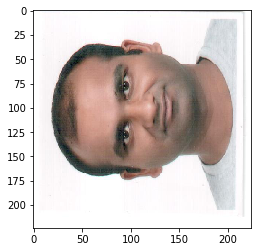

You look like a ...

Dachshund


In [0]:
Go_Goofy('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/my_images/prarit_001.jpg')

hello, human!


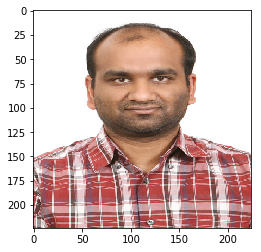

You look like a ...

Dachshund


In [0]:
Go_Goofy('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/my_images/prarit_002.jpg')

hello, dog!


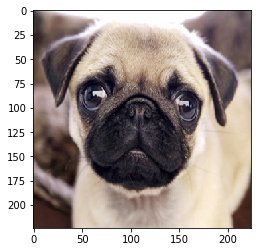

You look like a ...

Bulldog


In [0]:
Go_Goofy('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/my_images/pug.jpg')

hello, dog!


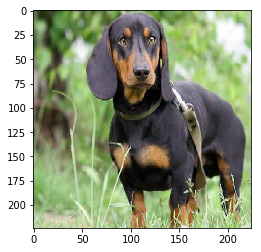

You look like a ...

Dachshund


In [0]:
Go_Goofy('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/my_images/Dachshund.jpg')

Error: The image contains neither a dog nor a human!


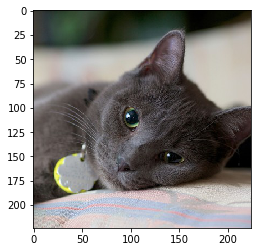

hello, you don't look like a human or a dog!


In [0]:
Go_Goofy('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/my_images/cat_1.jpg')

Error: The image contains neither a dog nor a human!


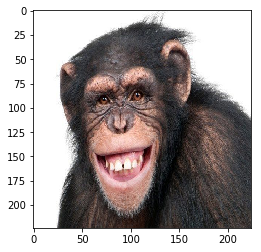

hello, you don't look like a human or a dog!


In [0]:
Go_Goofy('/content/gdrive/My Drive/Colab Notebooks/dog-project-master/my_images/monkey.jpg')